Get the required packages in place.

In [1]:
using Flux;
using Flux.Data.MNIST;
using Flux: onehotbatch, onecold, crossentropy, throttle
using Statistics
using Base.Iterators: repeated, partition
using Images

Get the images and labels from MNIST dataset.

In [2]:
images = MNIST.images();
labels = onehotbatch(MNIST.labels(), 0:9);

10×60000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 false   true  false  false  false  …  false  false  false  false  false
 false  false  false   true  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false   true  false  false  false
 false  false   true  false  false     false  false  false  false  false
  true  false  false  false  false  …  false  false   true  false  false
 false  false  false  false  false     false  false  false   true  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false      true  false  false  false   true
 false  false  false  false   true     false  false  false  false  false

Prepare the training data.

In [3]:
train = [(cat(float.(images[i])..., dims = 4), labels[:,i])
         for i in partition(1:60_000, 100)]

600-element Array{Tuple{Array{Float64,4},Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}},1}:
 ([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [false true … false false; false false … false true; … ; false false … false false; false false … false false])  
 ([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ;

In [4]:
tX = cat(float.(MNIST.images(:test)[1:100])..., dims = 4)
tY = onehotbatch(MNIST.labels(:test)[1:100], 0:9)

10×100 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 false  false  false   true  false  …  false  false  false  false  false
 false  false   true  false  false     false   true  false  false  false
 false   true  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false   true      true  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false   true  false
  true  false  false  false  false     false  false   true  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false   true

In [5]:
model = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(288, 10), softmax)

Chain(Conv((2, 2), 1=>16, NNlib.relu), getfield(Main, Symbol("##5#8"))(), Conv((2, 2), 16=>8, NNlib.relu), getfield(Main, Symbol("##6#9"))(), getfield(Main, Symbol("##7#10"))(), Dense(288, 10), NNlib.softmax)

In [6]:
loss(x, y) = crossentropy(model(x), y)
opt = ADAM(params(model))
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))
   evalcb = throttle(() -> @show(accuracy(tX, tY)), 10)

(::getfield(Flux, Symbol("#throttled#18")){getfield(Flux, Symbol("##throttled#10#14")){Bool,Bool,getfield(Main, Symbol("##11#12")),Int64}}) (generic function with 1 method)

In [7]:
@time Flux.train!(loss, train, opt, cb = evalcb)

accuracy(tX, tY) = 0.2
accuracy(tX, tY) = 0.36
accuracy(tX, tY) = 0.7
accuracy(tX, tY) = 0.75
accuracy(tX, tY) = 0.8
accuracy(tX, tY) = 0.86
accuracy(tX, tY) = 0.88
accuracy(tX, tY) = 0.89
accuracy(tX, tY) = 0.9
accuracy(tX, tY) = 0.89
accuracy(tX, tY) = 0.92
accuracy(tX, tY) = 0.94
accuracy(tX, tY) = 0.9
accuracy(tX, tY) = 0.92
accuracy(tX, tY) = 0.97
accuracy(tX, tY) = 0.95
185.809637 seconds (218.27 M allocations: 57.873 GiB, 36.03% gc time)


Following function takes input as RGB image of the number created as explained in the report. It returns the output as the number by inferencing based on the model created above. The number can be any single digit or multiple digit number.

In [8]:
function read_image(num)
    num_gs = Gray.(num)
    imgs = [num_gs[1:28, (i-1)*28 + 1: i*28] for i in 1:(Int64((size(num_gs)[2])/28))]
    number = 0
    i = 0
    for j in reverse(1:length(imgs))
        my_num_gs = [(cat(float(imgs[j]), dims = 4))]
        mynum = onecold(model(my_num_gs[1])) .-1
        number = number + (10^i)*mynum[1]
        i += 1
    end
    return number
end


read_image (generic function with 1 method)

Load all images (only with jpg extension) to my_images array.

,,,,,,

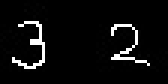
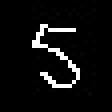
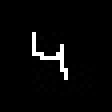
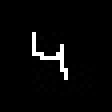
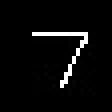
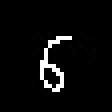
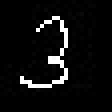

In [9]:
using Images
files = readdir("data/")
my_images = [load("data/"*file) for file in files if(occursin("jpg",file))]


Inference all images in the array and time each inferecing using @time.

In [11]:
for i in 1:length(my_images)
@time    println(read_image(my_images[i]))
end

32
  0.001227 seconds (6.51 k allocations: 1.363 MiB)
5
  0.000578 seconds (3.27 k allocations: 698.219 KiB)
4
  0.000468 seconds (3.27 k allocations: 698.219 KiB)
4
  0.000531 seconds (3.27 k allocations: 698.219 KiB)
7
  0.000464 seconds (3.27 k allocations: 698.219 KiB)
1
  0.000472 seconds (3.27 k allocations: 698.219 KiB)
3
  0.000520 seconds (3.27 k allocations: 698.219 KiB)
